# Intro to Data Science : HW Assignment 4 

### Replicating the analysis available on : http://tomaugspurger.github.io/modern-5-tidy.html 

## Modern Pandas: Tidy Data
### The purpose of the analysis is calculating the number of days of rest NBA teams have between games.

### Find below the comments explaining what is the purpose of each line of code.

Hadley Wickham states that ,
Tidy datasets are easy to manipulate, model and visualize, and have a speciﬁc structure as follows:
#### 1. each variable is a column
#### 2. each observation is a row
#### 3. each type of observational unit is a table.
Like families, tidy datasets are all alike but every messy dataset is messy in its own way.
Tidy datasets provide a standardized way to link the structure of a dataset (its physical layout) with its semantics (its meaning).

In [30]:
%matplotlib inline
#%matplotlib inline sets the backend of matplotlib to the 'inline' backend
#With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.
#The resulting plots will then also be stored in the notebook document.

import os  
#Importing os module in python provides a way of using system depended functionality.
#The functions that the OS module provides allows one to interface with the underlying operating system that Python is running on be that Windows, Mac or Linux. 

import numpy as np 
#Numpy is the core library for scientific computing in Python. np is an alias pointing to numpy

import pandas as pd 
#Pandas is widely used Python library in data science mainly used for data munging.

import seaborn as sns 
#Seaborn is a Python visualization library based on matplotlib providing a high-level interface for drawing attractive statistical graphics.

import matplotlib.pyplot as plt 
#matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. 

if int(os.environ.get("MODERN_PANDAS_EPUB", 0)): 
#int() method takes 2 arguments (No of string to be converted , base)
    import prep # noqa 
#Lines that contain a "noqa" comment at the end will not issue warnings.

pd.options.display.max_rows = 10 
#pandas has an options system that lets us customize some aspects of its behaviour.
#display-related option here max_rows set the max number of rows that will be displayed to 10.

sns.set(style='ticks', context='talk')
#sns.set_style("ticks") by default sets the ticks up to face outwards on the axes in graphs
#sns.set_context() affects things like the size of the labels, lines etc.For 'talk' by default the font scale is 1.3

We'll grab some NBA game data from basketball-reference.com using pandas' read_html function, which returns a list of DataFrames.

In [36]:
tables = pd.read_html("http://www.basketball-reference.com/leagues/NBA_2016_games.html")
#read_html :function imports a table from a webpage as a list.

games = tables[0] 

games.head()
#dataframe.head(n) :returns a DataFrame holding the first n rows of df and by default it returns the first 5 rows.

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,,.1,Notes
0,"Tue, Oct 27, 2015",8:00 pm,Detroit Pistons,106,Atlanta Hawks,94,Box Score,NaN,NaN
1,"Tue, Oct 27, 2015",8:00 pm,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,NaN,NaN
2,"Tue, Oct 27, 2015",10:30 pm,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,NaN,NaN
3,"Wed, Oct 28, 2015",7:30 pm,Philadelphia 76ers,95,Boston Celtics,112,Box Score,NaN,NaN
4,"Wed, Oct 28, 2015",7:30 pm,Chicago Bulls,115,Brooklyn Nets,100,Box Score,NaN,NaN


### Output 1:
In the above code the list of DataFrame objects returned by function read_html is assigned to tables.To enable manipulation on the list, tables[0] is assigned to games.The function games.head() returned first 5 rows of the DataFrame 'games'.

As you can see, we have a bit of general munging to do before tidying. Each month slips in an extra row of mostly NaNs (Not a number), the column names aren't too useful, and we have some dtypes to fix up.

In [37]:
column_names = {'Date': 'date', 'Start (ET)': 'start',
                'Unamed: 2': 'box', 'Visitor/Neutral': 'away_team', 
                'PTS': 'away_points', 'Home/Neutral': 'home_team',
                'PTS.1': 'home_points', 'Unamed: 7': 'n_ot'}   

games = (games.rename(columns=column_names)
    .dropna(thresh=4)
    [['date', 'away_team', 'away_points', 'home_team', 'home_points']]
    .assign(date=lambda x: pd.to_datetime(x['date'], format='%a, %b %d, %Y'))
    .set_index('date', append=True)
    .rename_axis(["game_id", "date"])
    .sort_index())

#rename() : function takes as argument the dict of new column names
#dropna() : Returns object with labels on given axis omitted where alternately any or all of the data are missing
#assign() : function helps to change the date format using to_datetime function of pandas
#set_index() :Sets the DataFrame index (row labels) using one or more existing columns and by default yields a new object.
#rename_axis() :Alters index and / or columns using input function or functions.A scalar or list-like for mapper will alter the Index.name or MultiIndex.names attribute.
#sort_index() : Sorts object by labels (along an axis)
 
games.head() 

,,away_team,away_points,home_team,home_points
game_id,date,,,,
0,2015-10-27,Detroit Pistons,106,Atlanta Hawks,94
1,2015-10-27,Cleveland Cavaliers,95,Chicago Bulls,97
2,2015-10-27,New Orleans Pelicans,95,Golden State Warriors,111
3,2015-10-28,Philadelphia 76ers,95,Boston Celtics,112
4,2015-10-28,Chicago Bulls,115,Brooklyn Nets,100


### Output 2:
Dictionary "column_names" is defined here to map relevant names to the columns.The main operations on dictionary is storing a value with some key and extracting the value given the key.

Using the various formatting functions, the dtypes are fixed and displayed with useful column names.

###### 1. dropna has a thresh argument. If at least thresh items are missing, the row is dropped. We used it to remove the "Month headers" that slipped into the table.
###### 2. assign can take a callable. This lets us refer to the DataFrame in the previous step of the chain. Otherwise we would have to assign temp_df = games.dropna()... And then do the pd.to_datetime on that.
###### 3. set_index has an append keyword. We keep the original index around since it will be our unique identifier per game.
###### 4. We use .rename_axis to set the index names (this behavior is new in pandas 0.18; before .rename_axis only took a mapping for changing labels).

## How many days of rest did each team get between each game?

In this case, an observation is a (team, game) pair, which we don't have yet. Rather, we have two observations per row, one for home and one for away. We'll fix that with pd.melt.

pd.melt works by taking observations that are spread across columns (away_team, home_team), and melting them down into one column with multiple rows. However, we don't want to lose the metadata (like game_id and date) that is shared between the observations. By including those columns as id_vars, the values will be repeated as many times as needed to stay with their observations.

In [48]:
tidy = pd.melt(games.reset_index(),
               id_vars=['game_id', 'date'], value_vars=['away_team', 'home_team'],
               value_name='team')

#pd.melt : “Unpivots” a DataFrame from wide format to long format, optionally leaving identifier variables set.

tidy.head()

,game_id,date,variable,team
0,0,2015-10-27,away_team,Detroit Pistons
1,1,2015-10-27,away_team,Cleveland Cavaliers
2,2,2015-10-27,away_team,New Orleans Pelicans
3,3,2015-10-28,away_team,Philadelphia 76ers
4,4,2015-10-28,away_team,Chicago Bulls


### Output 3 :
To understand how melt works ,we first create a pandas dataframe for it :

The below dataset has three variables (or features). One is stored in the row column.  The second one appears as column names (a,b, and c).  The last one is stored as entries in the table.
 
To tidy it, we need to melt, or stack it. In other words, we need to turn columns into rows. 

Melting is parameterised by a list of columns that are already variables, or id_vars for short. The other columns are converted into two variables: a new variable called variable that contains repeated column headings and a new variable called value that contains the concatenated data values from the previously separate columns


In [49]:
#Example to understand how melt works melt() :
messy1 = pd.DataFrame({'row' : ['A', 'B', 'C'], 'a' : [1, 2, 3], 'b' : [4, 5, 6], 'c' : [7, 8, 9]})
messy1.head()

,a,b,c,row
0,1,4,7,A
1,2,5,8,B
2,3,6,9,C


In [50]:
#Now, we use melt as follows :
tidy1 = pd.melt(messy, id_vars='row', var_name='dimension', value_name='length')
tidy1.head(10)

#Thus, as seen the dataframe here was converted from wide format to long format.

,row,dimension,length
0,A,a,1
1,B,a,2
2,C,a,3
3,A,b,4
4,B,b,5
5,C,b,6
6,A,c,7
7,B,c,8
8,C,c,9


The DataFrame tidy meets our rules for tidiness: each variable is in a column, and each observation (team, date pair) is on its own row. Now the translation from question ("How many days of rest between games") to operation ("date of today's game - date of previous game - 1") is direct:

In [87]:
# For each team... get number of days between games
tidy.groupby('team')['date'].diff().dt.days - 1

#groupby : Group series using mapper or by a series of columns 
#where mapper is dict or key function, apply given function to group, return result as series
#syntax :groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
71    1.0
72    2.0
73    2.0
74    2.0
75    0.0
Name: date, Length: 76, dtype: float64

### Output 4:
In the above query the data is grouped by on the basis of team and difference function is applied on date to get the number of dates for rest.

In [107]:
#Example to understand how groupby() works:
tidy1.groupby(['row', 'dimension'])['length'].mean() #tidy1 is the same object created in previous example.

row  dimension
A    a            1
     b            4
     c            7
B    a            2
     b            5
     c            8
C    a            3
     b            6
     c            9
Name: length, dtype: int64

In [109]:
tidy['rest'] = tidy.sort_values('date').groupby('team').date.diff().dt.days - 1
# sort_values : Sorts by the values along either axis
# syntax: sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

tidy.dropna().head()


,game_id,date,variable,team,rest
4,4,2015-10-28,away_team,Chicago Bulls,0.0
8,8,2015-10-28,away_team,Cleveland Cavaliers,0.0
14,14,2015-10-28,away_team,New Orleans Pelicans,0.0
17,17,2015-10-29,away_team,Memphis Grizzlies,0.0
18,18,2015-10-29,away_team,Dallas Mavericks,0.0


### Output 5:
Now sort the result by 'date' to make it easier to read using sort_values(). The result of above groupby() providing the number of days of rest is stored in 'rest'

To show the inverse of melt, let's take rest values we just calculated and place them back in the original DataFrame with a pivot_table.

In [111]:
by_game = (pd.pivot_table(tidy, values='rest',
                          index=['game_id', 'date'],
                          columns='variable')
             .rename(columns={'away_team': 'away_rest',
                              'home_team': 'home_rest'}))
#pivot_table() :Creates a spreadsheet-style pivot table as a DataFrame. 
#syntax: pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All'

df = pd.concat([games, by_game], axis=1)
#Concatenate pandas objects along a particular axis with optional set logic along the other axes.
#syntax: concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)

df.dropna().head()

,,away_team,away_points,home_team,home_points,away_rest,home_rest
game_id,date,,,,,,
17,2015-10-29,Memphis Grizzlies,112,Indiana Pacers,103,0.0,0.0
18,2015-10-29,Dallas Mavericks,88,Los Angeles Clippers,104,0.0,0.0
19,2015-10-29,Atlanta Hawks,112,New York Knicks,101,1.0,0.0
20,2015-10-30,Charlotte Hornets,94,Atlanta Hawks,97,1.0,0.0
21,2015-10-30,Toronto Raptors,113,Boston Celtics,103,1.0,1.0


### Output 6:
The pivot function is almost the inverse of the melt function.
#### pivot() doesn't accept a list for index. 
#### pivot_table() accepts a list for index.

pivot_table() works like pivot, but it aggregates the values from rows with duplicate entries for the specified columns.

So now, we have two tidy datasets, tidy for answering team-level questions, and df for answering game-level questions.

c:\users\vaibh\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


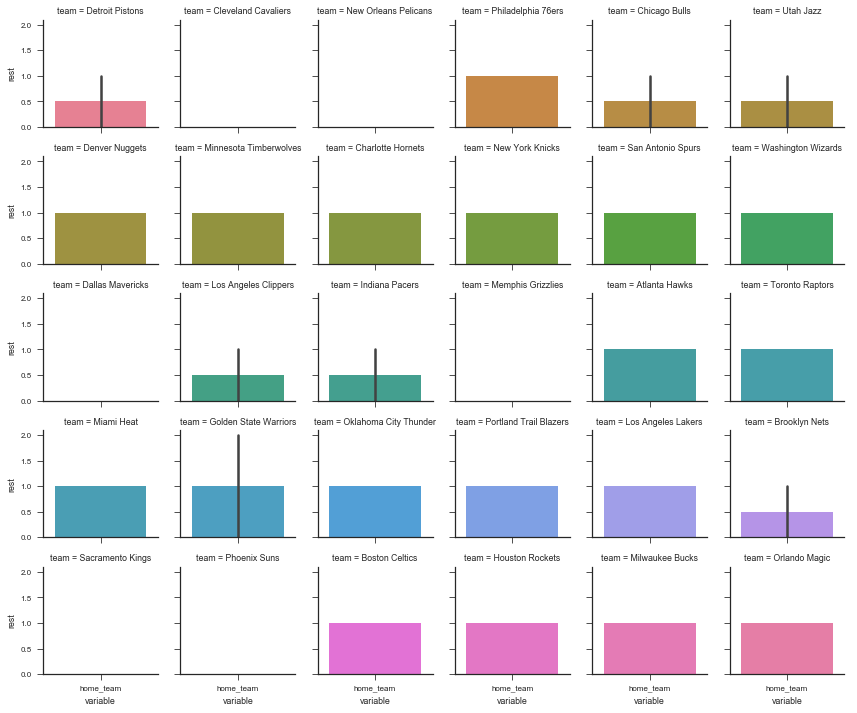

In [113]:
sns.set(style='ticks', context='paper')

#set_style: By default the seaborn theme is darkgrid. Setting ticks will set ticks outwards on the axis.
#set_context : By default the scaling is 'notebook'.We are setting it to paper here.

g = sns.FacetGrid(tidy, col='team', col_wrap=6, hue='team', size=2)
#FacetGrid() :used to draw plots with multiple Axes where each Axes shows the same relationship conditioned on different levels of some variable.

g.map(sns.barplot, 'variable', 'rest');
#map() :Map values of Series using input correspondence.
#The map() function applies a given function to each item of an iterable and returns a list of the results.

An example of a game-level statistic is the distribution of rest differences in games:

In [114]:
df['home_win'] = df['home_points'] > df['away_points']
df['rest_spread'] = df['home_rest'] - df['away_rest']
df.dropna().head()

,,away_team,away_points,home_team,home_points,away_rest,home_rest,home_win,rest_spread
game_id,date,,,,,,,,
17,2015-10-29,Memphis Grizzlies,112,Indiana Pacers,103,0.0,0.0,False,0.0
18,2015-10-29,Dallas Mavericks,88,Los Angeles Clippers,104,0.0,0.0,True,0.0
19,2015-10-29,Atlanta Hawks,112,New York Knicks,101,1.0,0.0,False,-1.0
20,2015-10-30,Charlotte Hornets,94,Atlanta Hawks,97,1.0,0.0,True,-1.0
21,2015-10-30,Toronto Raptors,113,Boston Celtics,103,1.0,1.0,False,0.0


### Output 7:
The dataset 'home_win' consists of Boolean values obtained after comparing 'home_points' and 'away_points'.
The dataset 'rest_spread' consists of difference in values of 'home_rest' and 'away_rest'. 

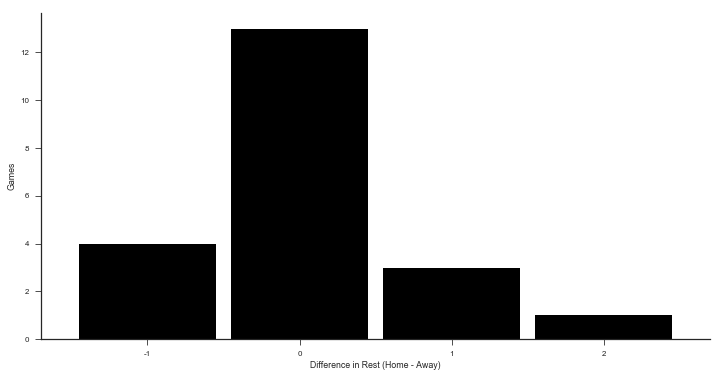

In [84]:
delta = (by_game.home_rest - by_game.away_rest).dropna().astype(int)
ax = (delta.value_counts()
    .reindex(np.arange(delta.min(), delta.max() + 1), fill_value=0)
    .sort_index()
    .plot(kind='bar', color='k', width=.9, rot=0, figsize=(12, 6))
)
#value_counts : Returns object containing counts of unique values.
#syntax : value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

#reindex: Conform DataFrame to new index with optional filling logic, placing NA/NaN in locations having no value in the previous index
#syntax: reindex(index=None, columns=None, **kwargs)

#plot : Make plots of DataFrame using matplotlib / pylab.

sns.despine()
#seaborn's despine() remove any spines (the outer edges of the plot) from a plot

ax.set(xlabel='Difference in Rest (Home - Away)', ylabel='Games');

### Output 8:
Here, the difference in the rest is store in the object delta.We have reindexed to have the rows numbered consecutively in the dataframe. The plot function is used to plot the bar graph which has Difference in Rest (Home-Away) on X axis and Games played on the Y axis. Width of each bar is set as 0.9.

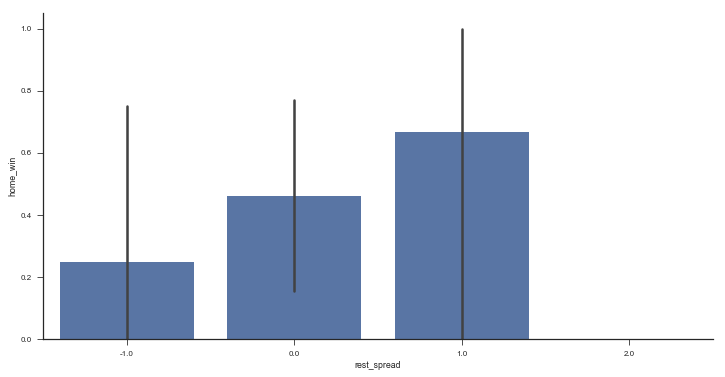

In [115]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='rest_spread', y='home_win', data=df.query('-3 <= rest_spread <= 3'),
            color='#4c72b0', ax=ax)

#barplot() :Show point estimates and confidence intervals as rectangular bars.
#It is also important to keep in mind that a bar plot shows only the mean (or other estimator) value

sns.despine()

### Output 9:
We use plt.subplots so far to convey to matplotlib, “prepare a graph”. Then when we use df.plot we pass ax to put all of our data into that one particular graph. The data is plotted on X axis having rest_spread and Y axis having home_win with a range of -3 to 3 across the mean.

In [23]:
rest = (tidy.groupby(['date', 'variable'])
            .rest.mean()
            .dropna())
rest.head()

date        variable 
2015-10-28  away_team    0.000000
            home_team    0.000000
2015-10-29  away_team    0.333333
            home_team    0.000000
2015-10-30  away_team    1.083333
Name: rest, dtype: float64

### Output 10:
rest is in a "long" form since we have a single column of data, with multiple "columns" of metadata.
In the above query the data is grouped by on the basis of date and variable. mean function is applied. dropna threshold is set to 4 in the start.

In [88]:
rest.unstack().head()
#syntax: unstack(level=-1, fill_value=None)

variable,away_team,home_team
date,,
2015-10-28,0.000000,0.000000
2015-10-29,0.333333,0.000000
2015-10-30,1.083333,0.916667
2015-10-31,0.166667,0.833333


### Output 11:
Pivoting a table is a special case of stacking a DataFrame.

Stacking a DataFrame means moving (also rotating or pivoting) the innermost column index to become the innermost row index. 

The inverse operation is called unstacking. It means moving the innermost row index to become the innermost column index. 

In [92]:
rest.unstack().stack()
#syntax: stack(level=-1, dropna=True)

date        variable 
2015-10-28  away_team    0.000000
            home_team    0.000000
2015-10-29  away_team    0.333333
            home_team    0.000000
2015-10-30  away_team    1.083333
            home_team    0.916667
2015-10-31  away_team    0.166667
            home_team    0.833333
dtype: float64

### Output 12:
Stacking makes the DataFrame taller, as it is “stacking” data in fewer columns and more rows. Similarly, unstacking usually makes it shorter and wider or broader. 

Thus, as seen in the above output the stack and unstack functions on rest resulted in the same output as before in Output 9.

In [97]:
#Example to understand stack and unstack.

index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),('two', 'a'), ('two', 'b')])
s = pd.Series(np.arange(1.0, 5.0), index=index)

#DataFrame s is contains numbers 1 to 4 with rows one and two having a and b variables each.

s.head()

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64

In [100]:
s.unstack(level=0)

#As seen the innermost row index 'one' and 'two' after unstacking became the column index.

,one,two
a,1.0,3.0
b,2.0,4.0


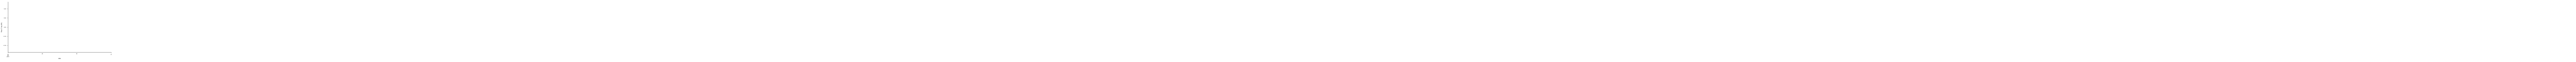

In [116]:
with sns.color_palette() as pal:
    b, g = pal.as_hex()[:2]

#color_palatte can take a list of colors specified in any valid matplotlib format (RGB tuples, hex color codes, or HTML color names).
#The return value is always a list of RGB tuples.

ax=(rest.unstack()
        .query('away_team < 7')
        .rolling(7)
        .mean()
        .plot(figsize=(12, 6), linewidth=3, legend=False))
ax.set(ylabel='Rest (7 day MA)')
ax.annotate("Home", (rest.index[-1][0], 1.02), color=g, size=14)
ax.annotate("Away", (rest.index[-1][0], 0.82), color=b, size=14)

#query() :Query the columns of a frame with a boolean expression. 
#rolling() : Provides rolling window calculcations.This is the number of observations used for calculating the statistic.Each window will be a fixed size.
#annotate() function in the pyplot module (or annotate method of the Axes class) is used to draw an arrow connecting two points on the plot.

sns.despine()

### Output 13
In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text data. Both of these arguments are (x,y) tuples.If we use .plot twice but give them both the same ax, the elements will be plotted on the same graph.

#### References : 
https://www.ibm.com/developerworks/community/blogs/jfp/entry/Tidy_Data_In_Python?lang=en

https://pandas.pydata.org/pandas-docs/stable/generated/